In [259]:
#1. Load Libraries
import pandas as pd
import opendatasets as od
import urllib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import os
from zipfile import ZipFile
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif



In [89]:
# 2. Load Dataset
train_zip_file= ZipFile("/Users/snaveed/Desktop/train.csv.zip")
test_zip_file = ZipFile("/Users/snaveed/Desktop/test.csv.zip")
features_zip_file = ZipFile("/Users/snaveed/Desktop/features.csv.zip")
sample_submission_zip_file = ZipFile("/Users/snaveed/Desktop/sampleSubmission.csv.zip")

### Reading from the zip files

In [91]:
train_df = pd.read_csv(train_zip_file.open('train.csv'))
test_df = pd.read_csv(test_zip_file.open('test.csv'))
features_df = pd.read_csv(features_zip_file.open('features.csv'))
stores_df = pd.read_csv("/Users/snaveed/Desktop/stores.csv")
submission_df = pd.read_csv(sample_submission_zip_file.open('sampleSubmission.csv'))

######  We can merge the ```train```, ```stores``` and ```features``` datasets for traiing and
###### merging ```test```, ```stores``` and ```features```

In [94]:
train_dataset = train_df.merge(stores_df, how = 'left').merge(features_df, how='left')
test_dataset = test_df.merge(stores_df, how = 'left').merge(features_df, how = 'left')

#### Statistical Interpretations

In [98]:
train_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [95]:
train_dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [96]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [97]:
train_dataset.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

##### Null Values in Percentage

In [100]:
train_dataset.isnull().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

##### Lets get the date column to get the date, year and month

In [101]:
train_dataset['Year'] = pd.to_datetime(train_dataset['Date']).dt.year
train_dataset['Month'] = pd.to_datetime(train_dataset['Date']).dt.month
train_dataset['Week'] = pd.to_datetime(train_dataset['Date']).dt.isocalendar().week

In [137]:
train_dataset
train_dataset = train_dataset.drop(columns = 'Date')

###### Lets move the Weekly Sales column which is our target column at the end

In [138]:
df  = train_dataset.pop('Weekly_Sales')
train_dataset['Weekly_Sales'] = df

In [139]:
train_dataset

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Weekly_Sales
0,1,1,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,24924.50
1,1,1,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,46039.49
2,1,1,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,41595.55
3,1,1,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,19403.54
4,1,1,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,39,508.37
421566,45,98,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,2012,10,40,628.10
421567,45,98,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,2012,10,41,1061.02
421568,45,98,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,2012,10,42,760.01


#### Splitting the input and target variables

In [171]:
input_cols = train_dataset.columns[:-1]
target_col = train_dataset.columns[-1]

X = train_dataset[input_cols].copy()
Y = train_dataset[target_col].copy()


### Train Validation Split, feature transformations

In [177]:
#Split the data
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size= 0.2, random_state=42)

# get the numerical and categorical columns 
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Imputing the numerical cols
imputer = SimpleImputer().fit(train_dataset[numerical_cols])
x_train[numerical_cols] = imputer.transform(x_train[numerical_cols])


#Scaling the numerical columns
scaler = MinMaxScaler().fit(train_dataset[numerical_cols])
x_train[numerical_cols] = scaler.transform(x_train[numerical_cols])


# Encoding the categorical cols
encoder = OneHotEncoder(sparse= False, handle_unknown='ignore').fit(train_dataset[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
x_train[encoded_cols] = encoder.transform(x_train[categorical_cols])

x_train = x_train[numerical_cols + encoded_cols] 



In [178]:
# Validation data transformation
x_val[numerical_cols] = imputer.transform(x_val[numerical_cols])
x_val[numerical_cols] = scaler.transform(x_val[numerical_cols])
x_val[encoded_cols] = encoder.transform(x_val[categorical_cols])
x_val  = x_val[numerical_cols + encoded_cols]
x_val.head()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Type_A,Type_B,Type_C
272342,0.613636,0.397959,0.927901,0.513601,0.564629,0.058159,0.189104,0.001746,0.009433,0.046901,0.040462,0.796243,1.0,0.000000,0.000000,1.0,0.0,0.0
176581,0.386364,0.938776,0.464300,0.392955,0.703407,0.083589,0.006050,0.000385,0.027450,0.020270,0.113105,0.402147,1.0,0.181818,0.176471,0.0,1.0,0.0
354212,0.840909,0.030612,0.026063,0.770352,0.809118,0.081742,0.034360,0.010367,0.050137,0.041462,0.029637,0.944700,0.5,0.363636,0.392157,0.0,0.0,1.0
281444,0.636364,0.326531,0.318073,0.445108,0.166834,0.081742,0.034360,0.010367,0.050137,0.041462,0.056539,0.592774,0.0,0.181818,0.176471,0.0,1.0,0.0
124208,0.272727,0.520408,1.000000,0.461644,0.184870,0.081742,0.034360,0.010367,0.050137,0.041462,0.003681,0.375311,0.0,0.818182,0.823529,1.0,0.0,0.0


## Fit model and calculate metrics
Functions for model fitting and calculating metrics

In [179]:
# def fit_model(x,y):
#      model_reg = LinearRegression().fit(x , y)
#      model_tree = DecisionTreeRegressor(random_state=42).fit(X,Y)
#      model_random_forest_tree = RandomForestRegressor(njobs= -1,random_state=42 ).fit(X,Y)
#      model_xbg = XGBRegressor(random_state=42).fit(X,Y)

#      return model_reg, model_tree, model_random_forest_tree, model_xbg


In [183]:
def calculate_metrics(model, x, y):
    y_train_preds= model.predict(x)

    # Calculating Accuracy Score and mean squared errors

    acc = model.score(x, y)
    mse = mean_squared_error(y, y_train_preds, squared=False)

    return acc, mse


In [218]:
model_reg = RandomForestRegressor(random_state=42).fit(x_train,y_train)
acc, mse = calculate_metrics(model_reg,x_train,y_train)
print(f"Accuracy : {acc} and Mean sq error: {mse} ")

Accuracy : 0.9964423195294323 and Mean sq error: 1352.772207678965 


The above result is just to see without feature selection and hyparameter tuning what is the mdoel accuracy and what is the mean squared error

Lets try the same with XG boost regressor

In [195]:
model_xgb = XGBRegressor(n_jobs=-1, random_state=42).fit(x_train,y_train)
acc, mse = calculate_metrics(model_xgb,x_train,y_train)
print(f"Accuracy : {acc} and Mean sq error: {mse} ")

Accuracy : 0.9494310174899725 and Mean sq error: 5100.154236269454 


Clearly Random Forest has the lead here, but lets see which one performs well on validation set

In [219]:
acc, mse = calculate_metrics(model_reg,x_val,y_val)
print(f"Accuracy : {acc} and Mean sq error: {mse} ")
display_df = pd.DataFrame([[acc, mse, x_val.shape[1]]], columns = ['Accuracy','Mean Sq Error', 'Feature Count'] )
display_df.index = ['All Features']
results = display_df
results

Accuracy : 0.973740523986635 and Mean sq error: 3700.4803781589108 


,Accuracy,Mean Sq Error,Feature Count
All Features,0.973741,3700.480378,18


In [197]:
acc, mse = calculate_metrics(model_xgb,x_val,y_val)
print(f"Accuracy : {acc} and Mean sq error: {mse} ")

Accuracy : 0.9451622075641994 and Mean sq error: 5347.552530711728 


The accuracy and MSE for Random Forest and XBG were pretty ok without any fearture selection

In [198]:
print(f"Feature Count :  {x_train.shape[1]}")

Feature Count :  18


Now lets see how will feature selection by removing the unneccesarry features to improve the model performance

## Feature Selection

We will use various techniques to select the best features for training the model

1. Variance Inflation factor - VIF
2. Filter Methods - 
This type of feature selection uses statistical methods to rank a given set of features. Moreover, it does this ranking regardless of the model you will be training on (i.e. you only need the feature values). When using these, it is important to note the types of features and target variable you have. Here are a few examples:

• Pearson Correlation (numeric features - numeric target, exception: when target is 0/1 coded) • ANOVA f-test (numeric features - categorical target)
• Chi-squared (categorical features - categorical target)




##### 1. Variance Inflation Factor - VIF

Multicollinearity occurs when there are 2 or more independent variables in a multiple regression model which have a high correlation among themselves.

When some features are highly correlated we might have difficukty in distinguihing between theeir individual edffetcs on the dependent variable.

Multicollinearity can be detected by various tehniques, once such is VIF (Variance Inflation Factor)

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factoir VIF is calculated.

The VIF can be calculated for numerical features only

In [199]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [201]:
variables = x_train[numerical_cols]

vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.787924,Store
1,2.869514,Dept
2,3.929036,Size
3,12.842167,Temperature
4,15.227776,Fuel_Price
5,8.804030,MarkDown1
6,1.546503,MarkDown2
7,1.114353,MarkDown3
8,5.148273,MarkDown4
9,2.693667,MarkDown5


In [203]:
vif.sort_values(['VIF'],ascending=False)

,VIF,features
14,530.462777,Week
13,500.910391,Month
4,15.227776,Fuel_Price
3,12.842167,Temperature
5,8.804030,MarkDown1
12,8.450397,Year
11,6.510545,Unemployment
8,5.148273,MarkDown4
2,3.929036,Size
0,3.787924,Store


Ideally the range of VIF consideration is as below:

VIF = 1 -> No Multicollinearity

1 < VIF < 5 -> Perfectly OK

10 < VIF -> Unacceptable

In [206]:
# Looking at features loess than 6
vif  = vif[vif['VIF']< 6]
vif

,VIF,features
0,3.787924,Store
1,2.869514,Dept
2,3.929036,Size
6,1.546503,MarkDown2
7,1.114353,MarkDown3
8,5.148273,MarkDown4
9,2.693667,MarkDown5
10,2.851400,CPI


There are 8 features with less VIF and may add more value to the model performance
Lets fit the model with only these features and make prediction

In [239]:
def feature_engineering(X,Y):
    x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size= 0.2, random_state=42)

    # get the numerical and categorical columns 
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X.select_dtypes(include='object').columns.tolist()

    # Imputing the numerical cols
    imputer = SimpleImputer().fit(X[numerical_cols])
    x_train[numerical_cols] = imputer.transform(x_train[numerical_cols])


    #Scaling the numerical columns
    scaler = MinMaxScaler().fit(X[numerical_cols])
    x_train[numerical_cols] = scaler.transform(x_train[numerical_cols])


    # Encoding the categorical cols
    encoder = OneHotEncoder(sparse= False, handle_unknown='ignore').fit(train_dataset[categorical_cols])
    encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
    x_train[encoded_cols] = encoder.transform(x_train[categorical_cols])

    x_train = x_train[numerical_cols + encoded_cols] 
    
    
    x_val[numerical_cols] = imputer.transform(x_val[numerical_cols])
    x_val[numerical_cols] = scaler.transform(x_val[numerical_cols])
    x_val[encoded_cols] = encoder.transform(x_val[categorical_cols])
    x_val = x_val[numerical_cols + encoded_cols]
    
    return x_train, x_val, y_train, y_val

In [240]:
cols_vif = list(vif['features'])
cols_vif
x_train_scaled, x_val_scaled, y_train,y_val = feature_engineering(X[cols_vif],Y)


model_reg = RandomForestRegressor(random_state=42).fit(x_train_scaled,y_train)

acc_Randm, mse_randm = calculate_metrics(model_reg,x_val_scaled,y_val)
print(f"Train Accuracy : {acc_Randm} and Train Mean sq error: {mse_randm} ")

display_df = pd.DataFrame([[acc_Randm, mse_randm, X[cols_vif].shape[1]]], columns = ['Accuracy','Mean Sq Error', 'Feature Count'] )

display_df.index = ['VIF features transformed']

results = results.append(display_df)
results

Train Accuracy : 0.9278063015096316 and Train Mean sq error: 6135.708567988706 


/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2478510667.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(display_df)


,Accuracy,Mean Sq Error,Feature Count
All Features,0.973741,3700.480378,18
VIF features,0.927806,6135.708568,8
VIF features transformed,0.927806,6135.708568,8


In [221]:
import joblib

In [223]:
walmart_sales = {
    'model': model_reg,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [224]:
joblib.dump(walmart_sales, 'walmart_sales.joblib')

['walmart_sales.joblib']

In [227]:
# reloading the models back
walmart_sales = joblib.load('walmart_sales.joblib')

2. Filter Method- Correlation Matrix

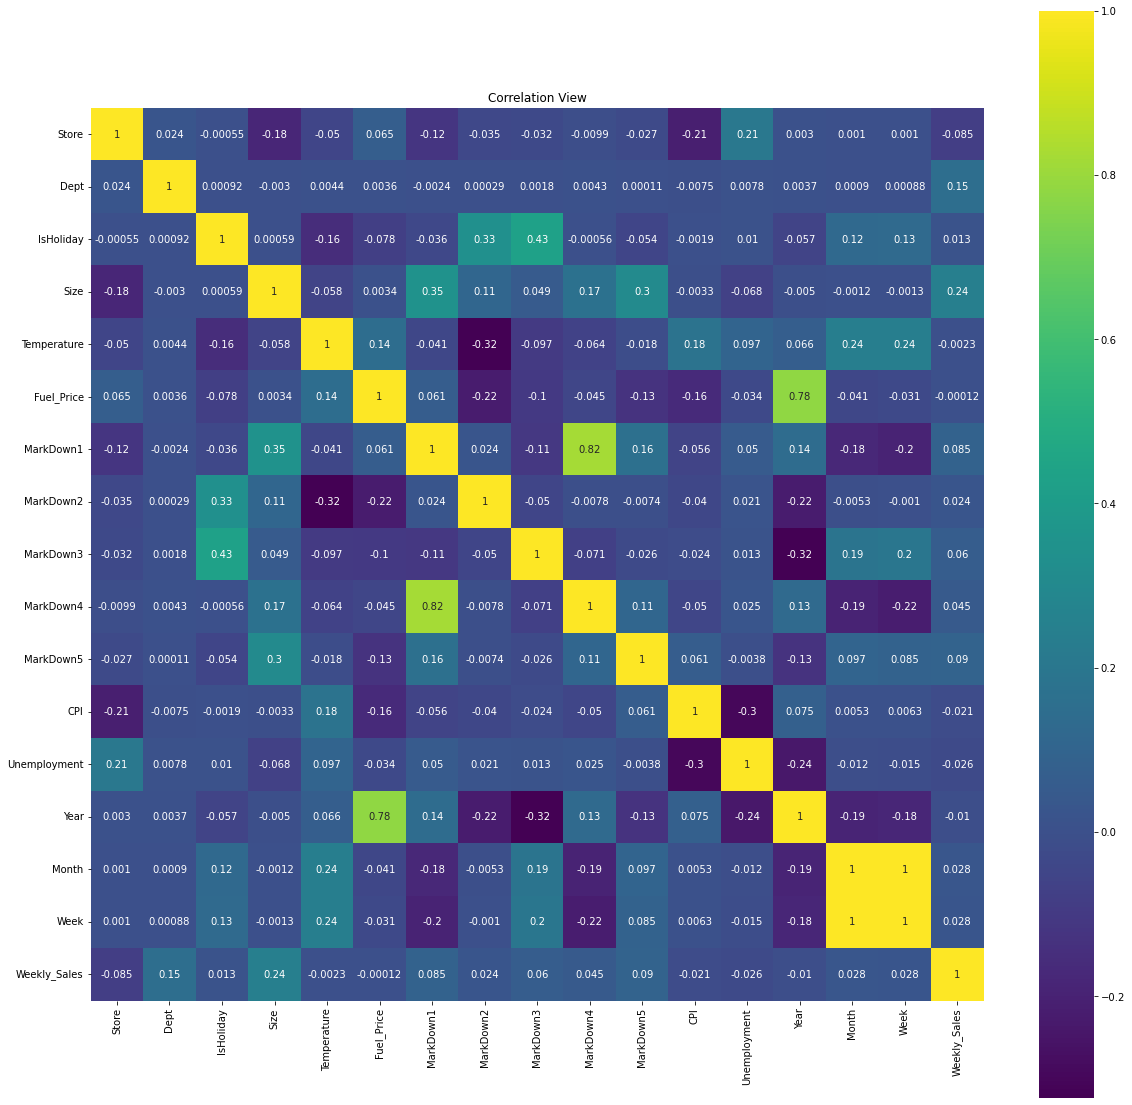

In [243]:
plt.figure(figsize = (20,20))

cor = train_dataset.corr()

sns.heatmap(cor, annot=True, cmap = 'viridis', square= True )
plt.title('Correlation View')
plt.show()

In [253]:
# Correlation with Target variable

cor_target = abs(cor['Weekly_Sales'])

# Select highly correlated features (threshold = 0.2)
features_corr = cor_target[cor_target>0.1]

#Collect the names of the features
col_corr = [index for index, value in features_corr.iteritems()] 

# Drop the target variable from the results
col_corr.remove('Weekly_Sales')
# Display the results
print(col_corr)


['Dept', 'Size']


In [254]:
# Evaluate the model with new features

x_train_scaled, x_val_scaled, y_train,y_val = feature_engineering(X[col_corr],Y)


model_reg = RandomForestRegressor(random_state=42).fit(x_train_scaled,y_train)

acc_Randm, mse_randm = calculate_metrics(model_reg,x_val_scaled,y_val)
print(f"Train Accuracy : {acc_Randm} and Train Mean sq error: {mse_randm} ")

display_df = pd.DataFrame([[acc_Randm, mse_randm, X[col_corr].shape[1]]], columns = ['Accuracy','Mean Sq Error', 'Feature Count'] )

display_df.index = ['Correlation']

results = results.append(display_df)
results

Train Accuracy : 0.8923539509374758 and Train Mean sq error: 7492.282167938051 


/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2525096358.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(display_df)


,Accuracy,Mean Sq Error,Feature Count
All Features,0.973741,3700.480378,18
VIF features,0.927806,6135.708568,8
VIF features transformed,0.927806,6135.708568,8
Correlation,0.892354,7492.282168,2


3. Univariate Selecrton with Scikit Learn

Sci-kit learn offers more filter methods in its feature selection module. Moreover, it also has convenience methods for how you would like to filter the features.

For this exercise, you will compute the ANOVA F-values to select the top 20 features using SelectKBest().

In [260]:
# Split, scale and transform the data 
x_train_scaled, x_val_scaled, y_train,y_val =feature_engineering(X,Y)

# Use SelectKBest to select the top 7 features based on f-test
selector = SelectKBest(f_classif, k=7)

# Fit to the scaled data and then transform it
x_new = selector.fit_transform(x_train_scaled,y_train)

# look at the features selected
feature_idx = selector.get_support()
print(feature_idx)



[False  True False False False  True  True  True  True  True False False
  True False False False False False]


In [276]:
# Lets get the names of the features
for name, included in zip(X.columns, feature_idx):
    print(f" {name} - {included}")

# getting the feature names which are included
ftest_cols = X[['Dept', 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'CPI' ]].columns
print(ftest_cols)

 Store - False
 Dept - True
 IsHoliday - False
 Type - False
 Size - False
 Temperature - True
 Fuel_Price - True
 MarkDown1 - True
 MarkDown2 - True
 MarkDown3 - True
 MarkDown4 - False
 MarkDown5 - False
 CPI - True
 Unemployment - False
 Year - False
 Month - False
 Week - False
Index(['Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'CPI'],
      dtype='object')


In [284]:
# Lets see the model performance now with the f-test feature selection
x_train_scaled, x_val_scaled, y_train,y_val = feature_engineering(X[ftest_cols],Y)

model_reg = RandomForestRegressor(random_state=42).fit(x_train_scaled,y_train)

acc_Randm, mse_randm = calculate_metrics(model_reg,x_val_scaled,y_val)
print(f"Train Accuracy : {acc_Randm} and Train Mean sq error: {mse_randm} ")

display_df = pd.DataFrame([[acc_Randm, mse_randm, X[ftest_cols].shape[1]]], columns = ['Accuracy','Mean Sq Error', 'Feature Count'] )

display_df.index = ['F-test']

results = results.append(display_df)
results

Train Accuracy : 0.5745406628234944 and Train Mean sq error: 14895.123463286423 


/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/1632868570.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(display_df)


,Accuracy,Mean Sq Error,Feature Count
All Features,0.973741,3700.480378,18
VIF features transformed,0.927806,6135.708568,8
F-test,0.574541,14895.123463,7


As you see the model performance declined

### Wrapper Methods for feature selection

Wrapper methods use a model to measure the effectiveness of a particular subset of features. As mentioned in class, one approach is to remove or add features sequentially. You can either start with 1 feature and gradually add until no improvement is made (forward selection), or do the reverse (backward selection). That can be done with the SequentialFeatureSelector class which uses k-fold cross validation scores to decide which features to add or remove. Recursive Feature Elimination is similar to backwards elimination but uses feature importance scores to prune the number of features. You can also specify how many features to remove at each iteration of the recursion. Let’s use this as the wrapper for our model below.

Recursive feature Elimination

You used the RandomForestClassifier as the model algorithm for which features should be selected. Now, you will use Recursive Feature Elimination, which wraps around the selected model to perform feature selection. This time, you can repeat the same task of selecting the top 20 features using RFE instead of SelectKBest.

In [292]:
# Split, scale and transform the data 
x_train_scaled, x_val_scaled, y_train,y_val = feature_engineering(X,Y)


In [293]:
# Define the model
model_reg = RandomForestRegressor(random_state=42).fit(x_train_scaled,y_train)

In [294]:
# Wrap the model
rfe = RFE(estimator = model_reg, n_features_to_select= 8)

In [295]:
# Fit rfe
rfe.fit(x_train_scaled, y_train)

KeyboardInterrupt: 

In [ ]:
# look at the features selected
feature_idx = X.columns[rfe.get_support()]
print(feature_idx)

In [ ]:
# Lets see the model performance with RFE
x_train_scaled, x_val_scaled, y_train,y_val = feature_engineering(X[feature_idx],Y)

model_reg = RandomForestRegressor(random_state=42).fit(x_train_scaled,y_train)

acc_Randm, mse_randm = calculate_metrics(model_reg,x_val_scaled,y_val)
print(f"Train Accuracy : {acc_Randm} and Train Mean sq error: {mse_randm} ")

display_df = pd.DataFrame([[acc_Randm, mse_randm, X[feature_idx].shape[1]]], columns = ['Accuracy','Mean Sq Error', 'Feature Count'] )

display_df.index = ['RFE']

results = results.append(display_df)
results

### Embedded Methods

Some models already have intrinsic properties that select the best features when it is constructed. With that, you can simply access these properties to get the scores for each feature. Let’s look at some examples in the following sections.


1. Feature 
Feature importance is already built-in in scikit-learn’s tree based models like RandomForest- Classifier. Once the model is fit, the feature importance is available as a property named fea- ture_importances_

In [296]:

x_train_scaled, x_val_scaled, y_train,y_val = feature_engineering(X,Y)

model_reg = RandomForestRegressor(random_state=42).fit(x_train_scaled,y_train)

feature_imp = pd.DataFrame({'Features': x_train_scaled.columns, 'Importance': model_reg.feature_importances_}).sort_values(by = 'Importance', ascending = False)

<AxesSubplot:xlabel='Importance', ylabel='Features'>

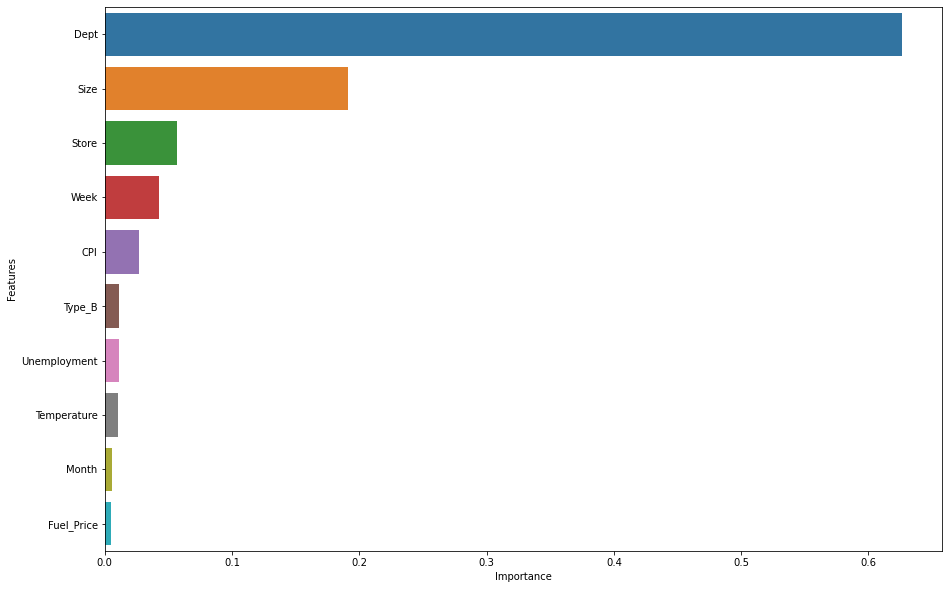

In [303]:
# Lets Plot it
import seaborn as sns
plt.figure(figsize= (15,10))
sns.barplot(data = feature_imp.head(10),x= 'Importance', y= 'Features')

Only Size and Dept and Store look like a good features according to feature importance
Lets try to check model performnce with this

In [305]:
fea_imp_cols = ['Dept', 'Size', 'Store']
fea_imp_cols

['Dept', 'Size', 'Store']

In [306]:
x_train_scaled, x_val_scaled, y_train,y_val = feature_engineering(X[fea_imp_cols],Y)

model_reg = RandomForestRegressor(random_state=42).fit(x_train_scaled,y_train)

acc_Randm, mse_randm = calculate_metrics(model_reg,x_val_scaled,y_val)
print(f"Train Accuracy : {acc_Randm} and Train Mean sq error: {mse_randm} ")

display_df = pd.DataFrame([[acc_Randm, mse_randm, X[fea_imp_cols].shape[1]]], columns = ['Accuracy','Mean Sq Error', 'Feature Count'] )

display_df.index = ['Feature Importance']

results = results.append(display_df)
results

Train Accuracy : 0.8979976967724981 and Train Mean sq error: 7293.232639911034 


/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/351601247.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(display_df)


,Accuracy,Mean Sq Error,Feature Count
All Features,0.973741,3700.480378,18
VIF features transformed,0.927806,6135.708568,8
F-test,0.574541,14895.123463,7
Feature Importance,0.897998,7293.232640,3


In [307]:
walmart_sales = {
    'model': model_reg,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

joblib.dump(walmart_sales, 'walmart_sales.joblib')

['walmart_sales.joblib']

#### Lets do Hyperparamer Tuning to even further improve the model performance

We will go with all features transformartion as that got us the least cost and highest accuracy and tune the model parametsr to look at the performandce

Lets fine tune the parameters to get close to a best fit model, it is this hyperparameter tuning which helps us greatly by modifying the parameters we pass to the model

Lets define a function which will take the arguments anf fit the model and return rmses for traning anf validation and plot the same for different values of passed parameters

In [311]:
def test_params(**params):
    model_new = RandomForestRegressor(random_state=42,n_jobs=-1, n_estimators=16, **params).fit(x_train,y_train)
    train_rmse = mean_squared_error(model_new.predict(x_train), y_train, squared = False)
    val_rmse = mean_squared_error(model_new.predict(x_val), y_val, squared = False)
    return train_rmse, val_rmse


Lets alde define a helper fucntion to test and plot the different values of a single parameter

In [316]:
def train_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params  = {param_name: value}
        train_rmse,val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize =(10,6))
    plt.title("Overfitting Curve" + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])


/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2746593359.py:15: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validation')
/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2746593359.py:15: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validation')
/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2746593359.py:15: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validati

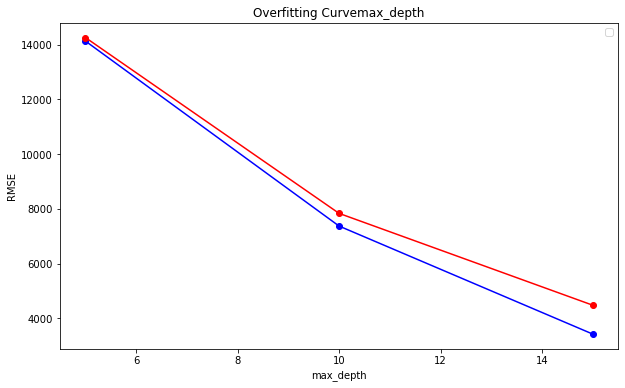

In [314]:
train_param_and_plot('max_depth' , range(5,20,5))

/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2746593359.py:15: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validation')
/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2746593359.py:15: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validation')
/var/folders/1c/v_y8nq7d2nj4hbrcn10hhb_80000gq/T/ipykernel_10039/2746593359.py:15: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validati

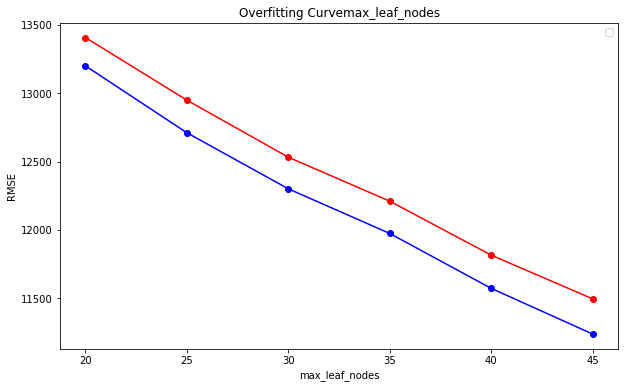

In [315]:
train_param_and_plot('max_leaf_nodes' , range(20,50,5))

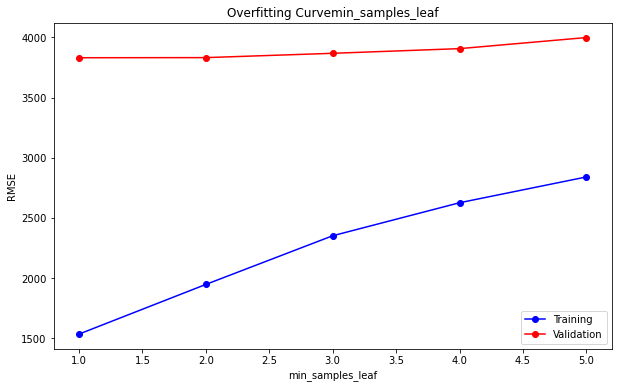

In [318]:
train_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5])

Training the Best Model

In [319]:
rf2 = RandomForestRegressor(n_estimators=16, random_state = 42, min_samples_leaf = 1, max_depth = 15, max_leaf_nodes = 45)

In [320]:
rf2.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_leaf_nodes=45, n_estimators=16,
                      random_state=42)

In [321]:
rf2.score(x_train, y_train)

0.7545157143651452

In [325]:
model_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [326]:
model_reg.score(x_val,y_val)

0.973740523986635

Making Predictions on test dataset

In [327]:
test_dataset['Year'] = pd.to_datetime(test_dataset['Date']).dt.year
test_dataset['Month'] = pd.to_datetime(test_dataset['Date']).dt.month
test_dataset['Week'] = pd.to_datetime(test_dataset['Date']).dt.isocalendar().week

In [329]:
test_dataset.head(3)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,44
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,45
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,46


In [330]:
test_dataset = test_dataset.drop(columns = 'Date')
test_dataset.head(3)

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,1,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,11,44
1,1,1,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,2012,11,45
2,1,1,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,2012,11,46


In [331]:
test_dataset[numerical_cols] = imputer.transform(test_dataset[numerical_cols])
test_dataset[numerical_cols] = scaler.transform(test_dataset[numerical_cols])
test_dataset[encoded_cols] = encoder.transform(test_dataset[categorical_cols])

In [333]:
test_inputs = test_dataset[numerical_cols + encoded_cols]

We can now make predictions using our final model.

In [335]:
test_preds = model_reg.predict(test_inputs)

Let's replace the values of the Weekly_Sales column with our predictions.

In [336]:
submission_df['Weekly_Sales'] = test_preds

Let's save it as a CSV file and download it.

In [337]:
submission_df.to_csv('submission.csv', index=False)

In [338]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/Users/snaveed/Desktop/Python files/My Scripts/submission.csv